In [20]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

In [4]:
print(iris_data.shape, iris_target.shape)

(150, 4) (150,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X = iris_data[:, [2,3]]
y = iris_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
import matplotlib.pyplot as plt

def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin)/1000),
                       np.arange(ymin, ymax, (ymax - ymin)/1000))
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=.5) 
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c="r", marker="^", label="0", s=100) 
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c="g", marker="o", label="1", s=100) 
  plt.scatter(X[y == 2, 0], X[y == 2, 1], c="b", marker="s", label="2", s=100)
  plt.xlim(xmin, xmax) 
  plt.ylim(ymin, ymax)
  plt.xlabel("Flower length")
  plt.ylabel("Flower width")
  plt.title(title)

In [23]:
from sklearn.svm import SVC

model1 = SVC(kernel="linear").fit(X_train_std, y_train)
model2 = SVC(kernel="poly", gamma=10, C=1.0).fit(X_train_std, y_train)
model3 = SVC(kernel="rbf", gamma=1., C=1.).fit(X_train_std, y_train)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54637 missing from current font.
  font.set_text

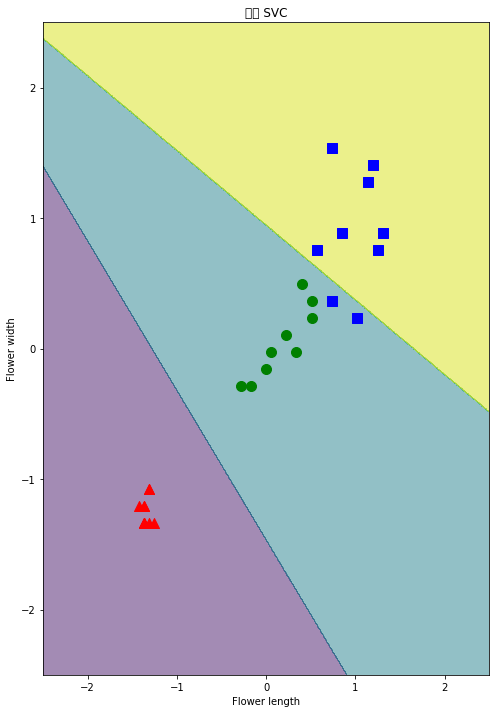

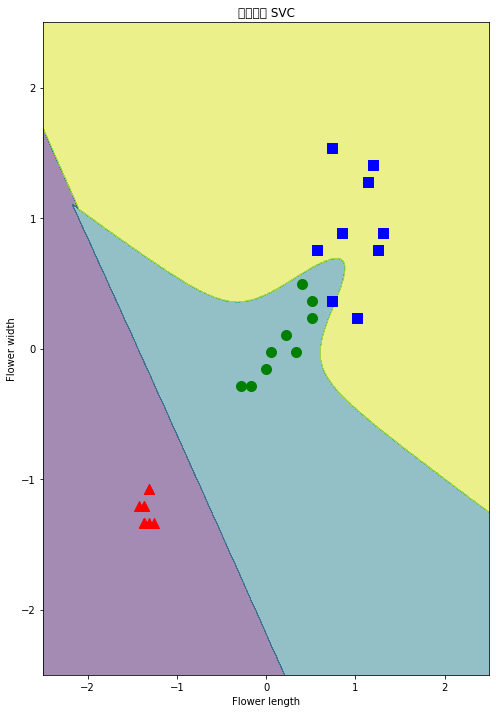

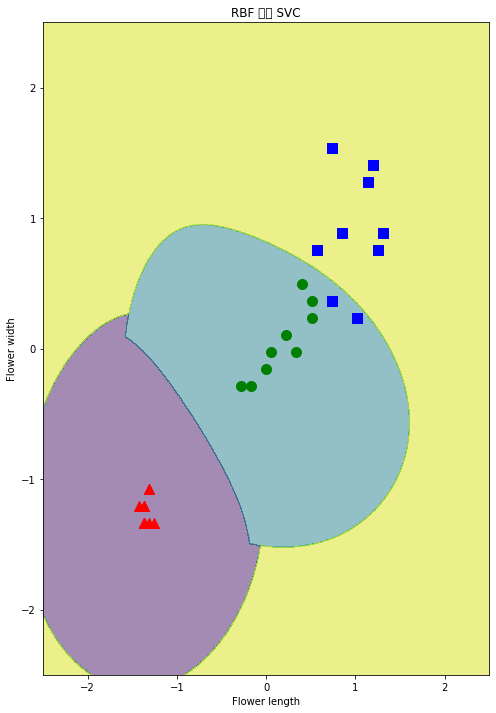

In [26]:
plt.figure(figsize=(8,12))
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.figure(figsize=(8,12))
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.figure(figsize=(8,12))
plot_iris(X_test_std, y_test, model3, "RBF 커널 SVC")